# Load Data
## Unzip data directory

In [68]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-07-22 17:54:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.3’

cats_and_dogs_filte 100%[===================>]  65.43M   233MB/s    in 0.3s    

2023-07-22 17:54:57 (233 MB/s) - ‘cats_and_dogs_filtered.zip.3’ saved [68606236/68606236]



In [69]:
import zipfile

# Unzip the archive
local_zip = '/kaggle/working/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

## Import Data

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/kaggle/working/cats_and_dogs_filtered/train"
val_dir = "/kaggle/working/cats_and_dogs_filtered/validation"

In [72]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=256,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.


In [73]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=256,
    class_mode='binary',
)

Found 1000 images belonging to 2 classes.


## Visualize data

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# get the first batch of images
images, _ = train_generator.__getitem__(0)
print(len(images))

256


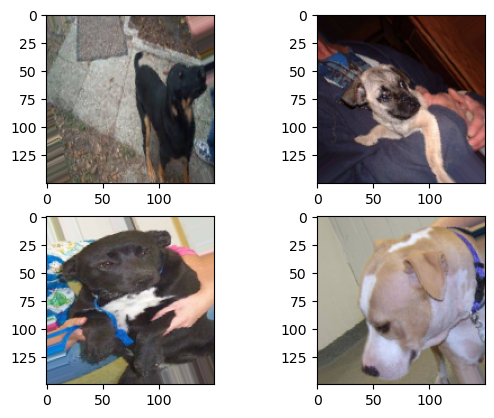

In [76]:
fig, ax = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        ax[r, c].imshow(images[r * 2 + c])
plt.show()

# Model

In [77]:
from tensorflow import keras
from tensorflow.keras.layers import *

In [78]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
#     Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
#     Dropout(0.5),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3), 
    
    Dense(1, activation='sigmoid')
])

In [79]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 64)       

In [80]:
from keras.optimizers import RMSprop, Adam

model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [81]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
hist = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
#     callbacks=[callback]
)

Epoch 1/30


2023-07-22 17:55:03.886635: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_22/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 17s 2s/step - loss: 0.7739 - accuracy: 0.5140 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 16s 2s/step - loss: 0.6926 - accuracy: 0.5010 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 3/30
8/8 [==============================] - 15s 2s/step - loss: 0.6955 - accuracy: 0.5130 - val_loss: 0.6912 - val_accuracy: 0.5620
Epoch 4/30
8/8 [==============================] - 16s 2s/step - loss: 0.6892 - accuracy: 0.5405 - val_loss: 0.6862 - val_accuracy: 0.5280
Epoch 5/30
4/8 [==============>...............] - ETA: 6s - loss: 0.7093 - accuracy: 0.5225

16, 64, 32, 1024, 256 (no relu at dense layer & dropout), rmsprop

0.6660 

add dense layer relu, add 0.3 dropout after all

0.7300 

layer 1 CNN to 32, all dropout 0.5

around 0.7

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])